In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
teams = pd.read_csv("teams.csv")

In [3]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [4]:
# we use Only Usefull Columns

In [5]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [6]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [7]:
teams.select_dtypes(include='number').corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [8]:
# Graphical Representation of the Data

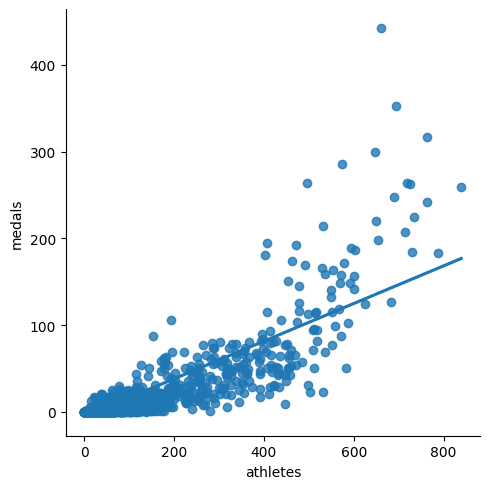

In [9]:
sns.lmplot(x = "athletes", y = "medals", data = teams, fit_reg = True , ci = None)

In [10]:
# Data Cleaning

In [11]:
teams.isnull().sum()

team             0
country          0
year             0
athletes         0
age              0
prev_medals    130
medals           0
dtype: int64

In [12]:
teams= teams.dropna()

In [13]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [14]:
#Split the  Data 80 : 20

In [15]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [16]:
train.shape

(1609, 7)

In [17]:
test.shape

(405, 7)

In [18]:
# Training the Model

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [20]:
predictors = ["athletes", "prev_medals"]
target = ["medals"]

In [21]:
reg.fit(train[predictors] , train["medals"])

LinearRegression()

In [22]:
predictions = reg.predict(test[predictors])

In [23]:
test["predictions"] = predictions

In [24]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [25]:
#Replace all negative prediction values in the predictions column with 0.

In [26]:
test.loc[test["predictions"] < 0 , "predictions"] = 0

In [27]:
# This rounds the prediction values to the nearest integer.

In [28]:
test["predictions"] = test["predictions"].round()

In [29]:
# Mean Absolute Error

#This calculates the Mean Absolute Error (MAE) between the actual medal counts and your model’s predicted counts.
#Because you must evaluate how well your machine learning model is performing.

In [30]:
from sklearn.metrics import mean_absolute_error
error =  mean_absolute_error(test["medals"], test["predictions"])

In [31]:
error

3.2987654320987656

In [32]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [33]:
mae = mean_absolute_error(test["medals"], test["predictions"])

In [34]:
test[["team", "year", "athletes", "prev_medals", "medals", "predictions"]].head(10)

,team,year,athletes,prev_medals,medals,predictions
6,AFG,2012,6,1.0,1,0.0
7,AFG,2016,3,1.0,0,0.0
24,ALB,2012,10,0.0,0,0.0
25,ALB,2016,6,0.0,0,0.0
37,ALG,2012,39,2.0,1,2.0
38,ALG,2016,74,1.0,2,4.0
48,AND,2012,6,0.0,0,0.0
49,AND,2016,4,0.0,0,0.0
57,ANG,2012,35,0.0,0,0.0
58,ANG,2016,26,0.0,0,0.0


In [35]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [36]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [41]:
def predict_medals_for_country(country_name):
    country_data = test[test["country"].str.lower() == country_name.lower()]
    
    if country_data.empty:
        print(f"No data found for country: {country_name}")
        return
    
    for _, row in country_data.iterrows():
        print(f"\nYear: {row['year']}")
        print(f"Team: {row['team']}")
        print(f"Athletes: {row['athletes']}, Previous Medals: {row['prev_medals']}")
        print(f"Predicted Medals: {round(row['predictions'], 2)}")

# Example usage:
predict_medals_for_country("India")



Year: 2012
Team: IND
Athletes: 95, Previous Medals: 3.0
Predicted Medals: 7.0

Year: 2016
Team: IND
Athletes: 130, Previous Medals: 6.0
Predicted Medals: 12.0


In [42]:
predict_medals_for_country("Japan")


Year: 2012
Team: JPN
Athletes: 399, Previous Medals: 51.0
Predicted Medals: 65.0

Year: 2016
Team: JPN
Athletes: 436, Previous Medals: 84.0
Predicted Medals: 92.0


In [43]:

#The Olympics Medals Predictor project is a supervised machine learning model built using 
#Python and Scikit-learn that aims to predict how many 
#medals a country will win in a given Olympic year based on historical data.


In [ ]:
#📌 Example Use Case
#Say you want to know how many medals India or USA might win in 2012, 2016, or 2020 
#based on their previous performance and number of athletes—they’re predicted using this model.

